<a href="https://colab.research.google.com/github/bzimons/mvp_puc_1/blob/mvp_development/mvp1_teste.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP: Análise de Dados e Boas Práticas
## Aluna: Beatriz Leal Simões e Silva

## 1. Definição do Problema

O dataset escolhido para a realização deste trabalho é sobre dados de séries de TV disponíveis em diversos serviços de *Streaming*.


. O dados foram obtidos na plataforma kaggle, disponíveis no link https://www.kaggle.com/datasets/ruchi798/tv-shows-on-netflix-prime-video-hulu-and-disney

O dataset é  composto dos seguintes atributos:

1.  **Row**: Index da linha
2.  **ID**: ID único da série de TV
3.  **Title**: Título da série
4.  **Year**: Ano de lançamento da série
5.  **Age**: Faixa etária recomendada
6.  **IMDb**: Nota do site IMDB
7.  **Rotten Tomatoes**: Nota do site Rotten Tomatoes
8.  **Netflix**: Se a série existe no Netflix (1 se sim, 0 se não)
9.  **Hulu**:  Se a série existe no Hulu (1 se sim, 0 se não)
10.  **Prime Video**:  Se a série existe no Prime Video (1 se sim, 0 se não)
11. **Type**: Se é filme ou série de TV


In [57]:
# importando as bibliotecas
import pandas as pd
import numpy as np

## 2. Leitura dos dados e tratamento



In [58]:
# Leitura e visualização do cabeçalho
path_tv = "https://raw.githubusercontent.com/bzimons/mvp_puc_1/main/tv_shows.csv"
df_tv = pd.read_csv(path_tv)
df_tv.head(10)

,Row,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,0,1,Breaking Bad,2008,18+,9.4/10,100/100,1,0,0,0,1
1,1,2,Stranger Things,2016,16+,8.7/10,96/100,1,0,0,0,1
2,2,3,Attack on Titan,2013,18+,9.0/10,95/100,1,1,0,0,1
3,3,4,Better Call Saul,2015,18+,8.8/10,94/100,1,0,0,0,1
4,4,5,Dark,2017,16+,8.8/10,93/100,1,0,0,0,1
5,5,6,Avatar: The Last Airbender,2005,7+,9.3/10,93/100,1,0,1,0,1
6,6,7,Peaky Blinders,2013,18+,8.8/10,93/100,1,0,0,0,1
7,7,8,The Walking Dead,2010,18+,8.2/10,93/100,1,0,0,0,1
8,8,9,Black Mirror,2011,18+,8.8/10,92/100,1,0,0,0,1
9,9,10,The Queen's Gambit,2020,18+,8.6/10,92/100,1,0,0,0,1


In [59]:
print(df_tv.isnull().any())

Row                False
ID                 False
Title              False
Year               False
Age                 True
IMDb                True
Rotten Tomatoes    False
Netflix            False
Hulu               False
Prime Video        False
Disney+            False
Type               False
dtype: bool


À primeira vista, podemos notar a necessidade de realizar certos tratamentos aos dados, como a presença de dados faltantes nas colunas "Age" e "IMDb.

As colunas **Rotten Tomatoes** e **IMDb** possuem a nota de avaliação da série sendo um valor de 10 ou de 100. Estas colunas podem ser facilmente transformadas em valores numéricos. Em ambas colunas a melhor estratégia será remover os últimos dígitos, pois é o padrão identificável ao observar os valores únicos.

In [60]:
unique_IMDb = df_tv['IMDb'].unique()
print(unique_IMDb)

['9.4/10' '8.7/10' '9.0/10' '8.8/10' '9.3/10' '8.2/10' '8.6/10' '8.5/10'
 '8.3/10' '8.1/10' '8.4/10' '8.0/10' '7.6/10' '9.1/10' '7.5/10' '7.7/10'
 '8.9/10' '7.9/10' '7.8/10' '7.2/10' '6.8/10' '7.3/10' '7.4/10' '6.2/10'
 '6.5/10' '6.7/10' '7.1/10' '5.4/10' '6.1/10' '4.9/10' '6.4/10' '6.9/10'
 '6.6/10' '7.0/10' '5.9/10' '5.8/10' '6.3/10' '4.6/10' '5.5/10' '6.0/10'
 '5.7/10' '5.0/10' '3.4/10' '4.7/10' '5.3/10' '4.3/10' '5.6/10' '3.8/10'
 '5.1/10' '3.9/10' '4.5/10' nan '5.2/10' '4.8/10' '3.5/10' '4.2/10'
 '3.6/10' '4.4/10' '3.7/10' '1.1/10' '3.3/10' '4.1/10' '4.0/10' '2.5/10'
 '2.7/10' '3.2/10' '2.3/10' '9.2/10' '2.8/10' '3.1/10' '1.8/10' '3.0/10'
 '2.6/10' '1.9/10' '1.5/10' '2.9/10' '2.4/10' '9.5/10' '9.6/10']


In [61]:
unique_tomatoes = df_tv['Rotten Tomatoes'].unique()
print(unique_tomatoes)

['100/100' '96/100' '95/100' '94/100' '93/100' '92/100' '90/100' '89/100'
 '88/100' '87/100' '86/100' '85/100' '84/100' '83/100' '82/100' '81/100'
 '80/100' '79/100' '78/100' '77/100' '76/100' '75/100' '74/100' '73/100'
 '72/100' '71/100' '70/100' '69/100' '68/100' '67/100' '66/100' '65/100'
 '64/100' '63/100' '62/100' '61/100' '60/100' '59/100' '58/100' '57/100'
 '56/100' '55/100' '54/100' '53/100' '52/100' '51/100' '50/100' '49/100'
 '48/100' '47/100' '46/100' '45/100' '44/100' '43/100' '42/100' '41/100'
 '40/100' '39/100' '38/100' '37/100' '36/100' '35/100' '34/100' '33/100'
 '32/100' '31/100' '30/100' '29/100' '28/100' '27/100' '26/100' '25/100'
 '24/100' '23/100' '22/100' '21/100' '20/100' '19/100' '18/100' '17/100'
 '16/100' '14/100' '13/100' '10/100' '91/100']


In [62]:
#tratamento das colunas
df_tv['IMDb'] = df_tv['IMDb'].str.replace('/10$','',regex=True)
df_tv['Rotten Tomatoes'] = df_tv['Rotten Tomatoes'].str.replace('/100$','',regex=True)
df_tv.head(5)

,Row,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,0,1,Breaking Bad,2008,18+,9.4,100,1,0,0,0,1
1,1,2,Stranger Things,2016,16+,8.7,96,1,0,0,0,1
2,2,3,Attack on Titan,2013,18+,9.0,95,1,1,0,0,1
3,3,4,Better Call Saul,2015,18+,8.8,94,1,0,0,0,1
4,4,5,Dark,2017,16+,8.8,93,1,0,0,0,1


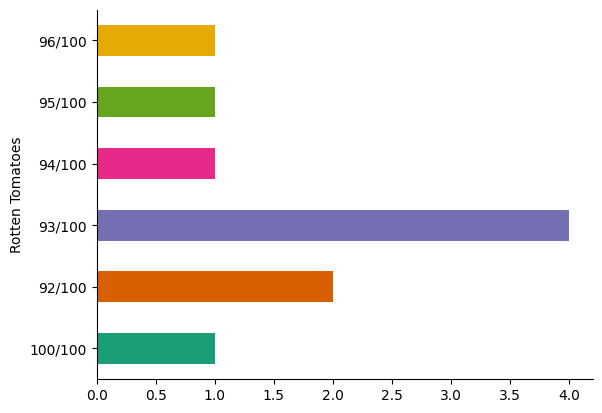

In [53]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('Rotten Tomatoes').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

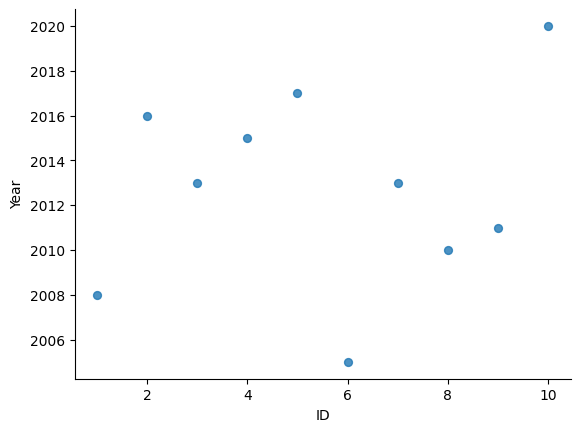

In [54]:
from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='ID', y='Year', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [55]:
print(df_tv.shape)

(5368, 12)


In [56]:
df_winter = df_tv.loc[df_tv['games_type'] =="Winter"]
df_summer = df_tv.loc[df_tv['games_type'] =="Summer"]
print("Olimpíadas de verão:\n", df_summer.shape)
print("Olimpíadas de inverno:\n", df_winter.shape)

KeyError: ignored

In [ ]:
df_tv.describe()

aaaaaaaaaaaaaaaaaaaaaaaaaa